## Import library

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-by-steel-production-19672021/steel_prod.csv


## Define file and read data

In [2]:
file = '/kaggle/input/countries-by-steel-production-19672021/steel_prod.csv'

df = pd.read_csv(file)

## Reshaping the DataFrame for further analysis by transforming it from a wide format to a long format.
 

In [3]:
df_me = pd.melt(df, id_vars=['Rank', 'Country/Region'], var_name='year', value_name='production').drop('Rank', axis=1)

## Performing column cleanup

In [4]:
df_me.columns = ['country_region', 'year', 'production']

df_me = df_me.replace('-',np.nan)

df_me.production = df_me.production.astype(float)

df_me.year = df_me.year.astype(int)

## Conducting quick exploratory data analysis

In [5]:
df_me.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
year,931.0,2007.736842,13.908786,1967.0,2007.0,2012.00,2017.000,2021.0
production,862.0,65.986821,237.453157,0.1,4.2,7.55,26.725,1951.9


In [6]:
df_me.select_dtypes('object').describe().T

,count,unique,top,freq
country_region,931,49,World,19


In [24]:
print("Country and region list")
df_me.country_region.unique()

Country and region list


array(['World', 'China', 'European Union', 'India', 'Japan',
       'United States', 'Russia', 'South Korea', 'Turkey', 'Germany',
       'Brazil', 'Iran', 'Italy', 'Taiwan', 'Vietnam', 'Ukraine',
       'Mexico', 'Indonesia', 'Spain', 'France', 'Canada', 'Egypt',
       'Saudi Arabia', 'Poland', 'Austria', 'United Kingdom', 'Belgium',
       'Malaysia', 'Netherlands', 'Australia', 'Bangladesh', 'Thailand',
       'Pakistan', 'South Africa', 'Argentina', 'Slovakia',
       'Czech Republic', 'Sweden', 'Kazakhstan', 'Finland', 'Algeria',
       'Romania', 'United Arab Emirates', 'Belarus', 'Luxembourg', 'Oman',
       'Portugal', 'Soviet Union', 'Others'], dtype=object)

In [25]:
print ("Year list")
df_me.year.unique()

Year list


array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2000, 1990, 1980, 1967])

## Generating a quick plot to visualize the data

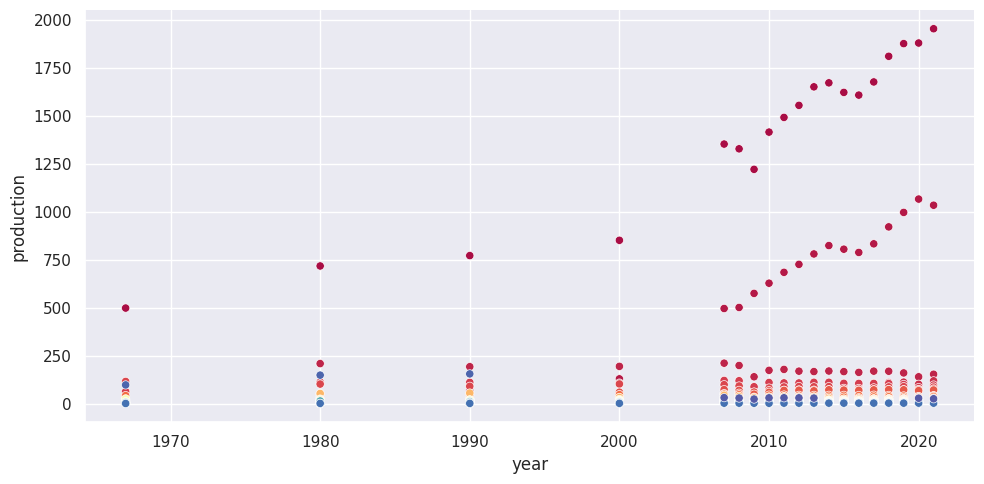

In [9]:
sns.relplot(data=df_me, x="year", y="production", hue="country_region", palette="Spectral", legend=False, aspect=2)

> The dataset contains too many data points. Consider downsampling for further analysis.

## Let's look at countries having the top 20% production of their respective years

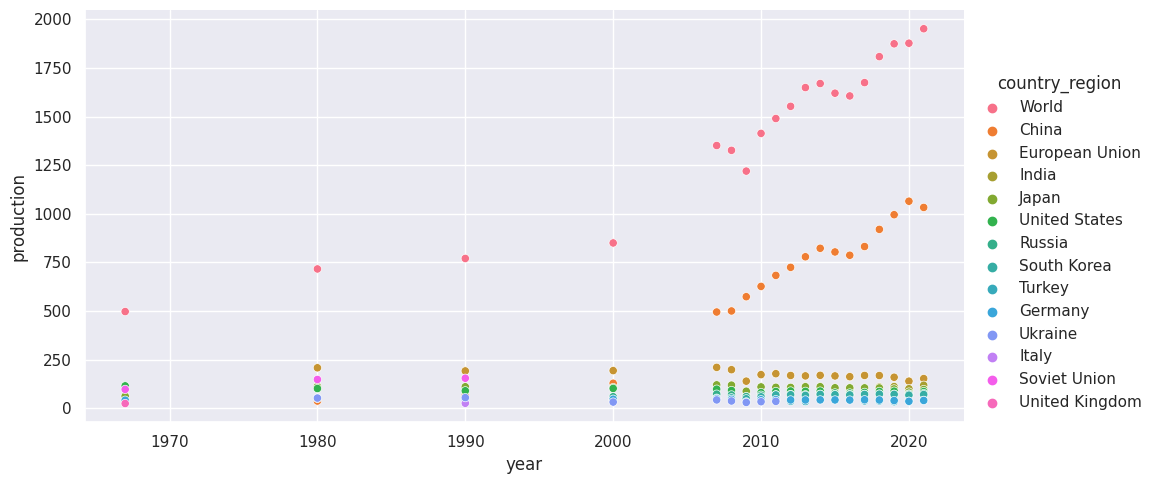

In [10]:
qa_08 = df_me.groupby('year')['production'].quantile(0.8).rename('production_08')

df_me_08 = pd.merge(df_me, qa_08, on='year').query("production>production_08")

sns.relplot(data=df_me_08, x="year", y="production",hue="country_region", aspect=2)

> Only 13 countries are major players in steel production in the last 50 years.

## Exploring steel production across different regions.

In [11]:
mapping = {'United States': 'americas',\
           'China': 'asia',\
           'India': 'asia',\
           'Japan': 'asia',\
           'South Korea': 'asia',\
           'Russia': 'europe',\
           'Turkey': 'europe',\
           'Germany': 'europe',\
           'Ukraine': 'europe',\
           'Italy': 'europe',\
           'Soviet Union': 'europe',\
           'United Kingdom': 'europe'}

## Let's categorize these 12 countries into different regions.

In [12]:
df_me_08['region'] = df_me_08.country_region
df_me_08['region'] = df_me_08['region'].map(mapping)

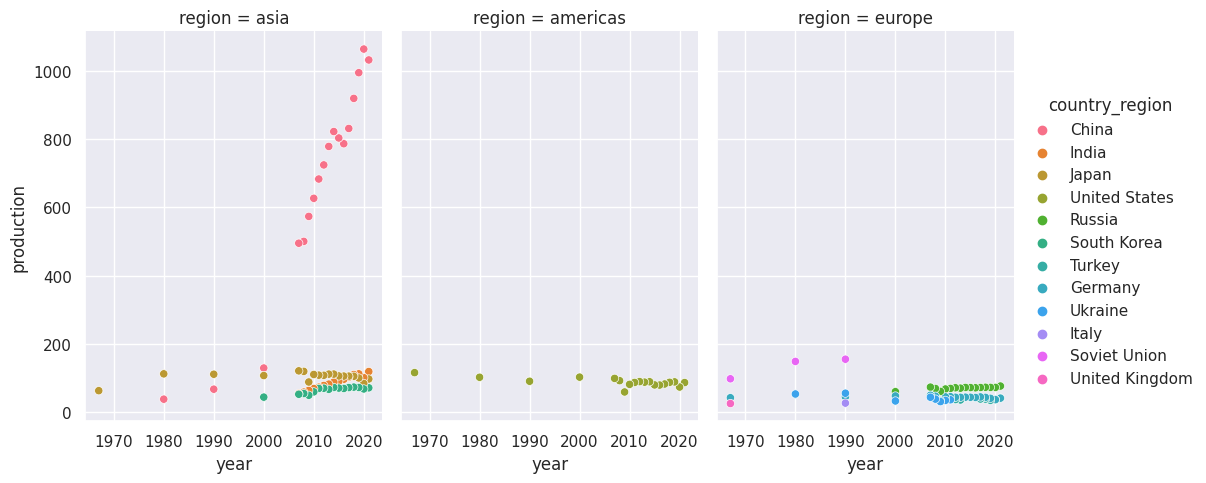

In [13]:
sns.relplot(data=df_me_08[df_me_08.region.notna()], x="year", y="production",col="region", hue="country_region", height=5, aspect=.7)

> Despite the numerous countries, the dataset reveals that steel production is predominantly concentrated in three main regions.

> Not surprisingly, Asia emerges as the sole growth area, with China clearly leading the pack.

> Production in the United States is trending downward.

> A closer examination of Europe reveals that the Soviet Union was once a prominent player before its disintegration.

## Let’s examine global production in comparison to the two largest emerging economies: China and India.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

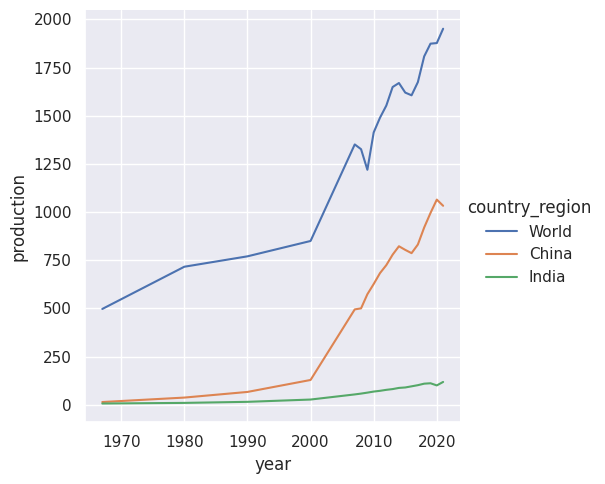

In [14]:
sns.relplot(data = df_me.query("country_region.isin(['India', 'China', 'World'])"), x="year", y="production", hue="country_region", kind = "line")

> Despite all the news surrounding India, its steel production remains significantly smaller than China’s and has minimal impact on the global scale.

## Now let’s examine China’s share of global production.

In [159]:
per1 = (df_me.query("country_region =='China' and year == 1967").iloc[0,2] / df_me.query("country_region =='World' and year == 1967").iloc[0,2])
percentage_string = "{:.0%}".format(per1)
print("China steel production as world percentage in 1967: " + percentage_string)

China steel production as world percentage in 1967: 3%


In [161]:
per1 = (df_me.query("country_region =='China' and year == 2021").iloc[0,2] / df_me.query("country_region =='World' and year == 2021").iloc[0,2])
percentage_string = "{:.0%}".format(per1)
print("China steel production as world percentage in 2021: " + percentage_string)

China steel production as world percentage in 2021: 53%


## There are eleven other industrial peer countries besides China. Let’s take a closer look at them.

In [15]:
ind_11 = ['India', 'Japan', 'United States', 'Russia', 'South Korea', 'Turkey', 'Germany', 'Ukraine', 'Italy', 'Soviet Union', 'United Kingdom']

In [18]:
df_ind_11 = df_me.loc[df_me.country_region.isin(ind_11)].groupby('year').sum().reset_index()

df_world = df_me.loc[df_me.country_region.isin(['World'])]

In [19]:
df_merged = pd.merge(df_world, df_ind_11, on='year')

df_merged['percentage'] = df_merged.production_y/df_merged.production_x

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


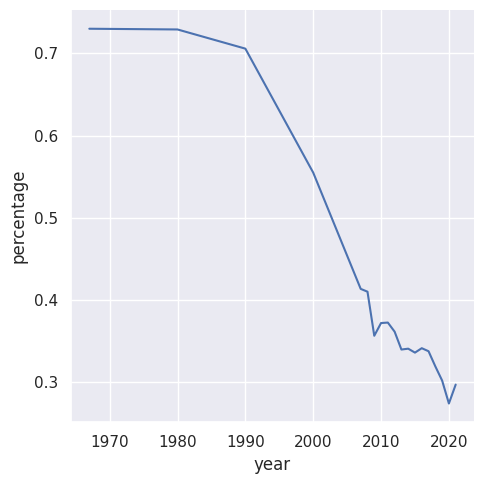

In [26]:
sns.relplot(data = df_merged, x="year", y="percentage", kind = "line")

> The share of global production held by the other 11 industrial countries is showing a downward trend since China's rise.

> Currently, the other 11 industrial countries account for 30% of global production, while China's share stands at 50%.

# China stands out as a significant player in its own league. Let's delve deeper into its data.

In [21]:
df_me_china = df_me.loc[df_me.country_region=='China'].sort_values('year').set_index('year')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


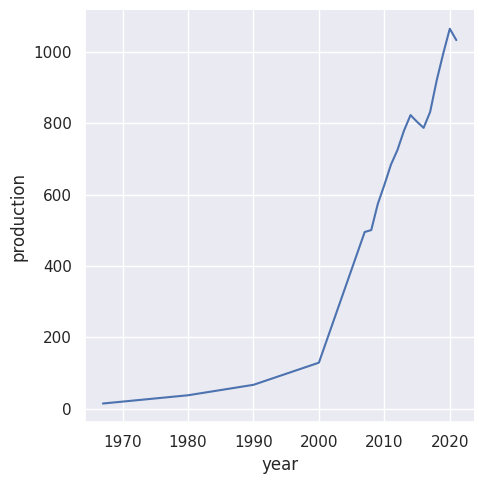

In [22]:
sns.relplot(data = df_me_china, x="year", y="production", kind = "line")

> From the graph, it's evident that most of China's growth occurred after 2000.

In [246]:
initial_value = df_me_china.production.loc[2000]
final_value = df_me_china.production.loc[2021]


# Calculate the number of periods
n_periods = len(df_me_china) - 1  # Number of rows minus 1

# Calculate compound growth rate
compound_growth_rate = (final_value / initial_value) ** (1 / n_periods) - 1

print("2000: ", initial_value)
print("2021: ", final_value)
print("Compound Growth Rate:", round(compound_growth_rate,2))

2000:  128.5
2021:  1032.8
Compound Growth Rate: 0.12


> The compound growth rate after 2000 is 12%. While it may not seem significant, over a span of 20 years, this growth translates to a tenfold increase.

## On data
* If steel is the currency of industrial might, then China emerges as a global superpower.
* After 2000, its production soared dramatically, maintaining a 12% growth rate. Compound growth is truly remarkable.
* China's growth shows no signs of slowing down, prompting the question: where is all this steel being utilized?

## On Seaborn
* The focus of this exercise is to utilize Seaborn for analysis and storytelling.
* While Seaborn offers impressive graphing capabilities, adjusting parameters and achieving desired graph outcomes can be time-consuming and challenging.
